## Extract topologies
Run once.

Timestamp 1505 : maximum average degree 

Timestamp 400 : average degree

Timestamp 816 : minimum average degree

Connection range : 30 km

In [1]:
import numpy as np
import pandas as pd
from swarm_sim import *
from tqdm import tqdm

In [2]:
PATH = '..\data\Traces_Nanosatellites\\track_'
satellites = {}

with tqdm(total=100, desc='Extracting data') as pbar:
    for i in range(0,100):
        df = pd.read_csv(PATH+str(i)+'.csv', sep=',', header=0)
        df['coords'] = ['x','y','z']
        satellites[i] = df.set_index('coords', drop=True)
        pbar.update(1)
    
DURATION = satellites[0].columns.tolist()

satellites[0].head()

Extracting data:   0%|          | 0/100 [00:00<?, ?it/s]

Extracting data: 100%|██████████| 100/100 [01:55<00:00,  1.15s/it]


,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
coords,,,,,,,,,,,,,,,,,,,,,
x,-4.850747e+05,-4.937755e+05,-5.024536e+05,-5.111086e+05,-5.197401e+05,-5.283476e+05,-5.369309e+05,-5.454894e+05,-5.540229e+05,-5.625310e+05,...,1.490967e+06,1.494274e+06,1.497573e+06,1.500865e+06,1.504149e+06,1.507425e+06,1.510693e+06,1.513954e+06,1.517206e+06,1.520451e+06
y,-7.066530e+05,-7.201117e+05,-7.335372e+05,-7.469290e+05,-7.602864e+05,-7.736088e+05,-7.868957e+05,-8.001464e+05,-8.133603e+05,-8.265368e+05,...,2.218138e+06,2.223313e+06,2.228477e+06,2.233629e+06,2.238769e+06,2.243898e+06,2.249015e+06,2.254120e+06,2.259214e+06,2.264296e+06
z,-2.026363e+06,-2.019625e+06,-2.012795e+06,-2.005871e+06,-1.998855e+06,-1.991747e+06,-1.984548e+06,-1.977257e+06,-1.969876e+06,-1.962403e+06,...,3.692429e+06,3.686602e+06,3.680756e+06,3.674890e+06,3.669006e+06,3.663103e+06,3.657180e+06,3.651239e+06,3.645278e+06,3.639299e+06


In [17]:
T_HIGH = 1505
T_AVG = 400
T_LOW = 816

df_high = pd.DataFrame(data=[[sat[str(T_HIGH)].x, sat[str(T_HIGH)].y, sat[str(T_HIGH)].z] for sat in satellites.values()],
                       columns=['x','y','z'])
df_high['sat_id'] = list(satellites.keys())
df_high = df_high.set_index('sat_id', drop=True)

df_avg = pd.DataFrame(data=[[sat[str(T_AVG)].x, sat[str(T_AVG)].y, sat[str(T_AVG)].z] for sat in satellites.values()],
                       columns=['x','y','z'])
df_avg['sat_id'] = list(satellites.keys())
df_avg = df_avg.set_index('sat_id', drop=True)

df_low = pd.DataFrame(data=[[sat[str(T_LOW)].x, sat[str(T_LOW)].y, sat[str(T_LOW)].z] for sat in satellites.values()],
                       columns=['x','y','z'])
df_low['sat_id'] = list(satellites.keys())
df_low = df_low.set_index('sat_id', drop=True)

,x,y,z
sat_id,,,
0,-1.187856e+06,-1.873302e+06,2.894047e+06
1,-1.174080e+06,-1.805950e+06,2.937518e+06
2,-1.142033e+06,-1.843987e+06,2.917934e+06
3,-1.219205e+06,-1.816814e+06,2.899690e+06
4,-1.088429e+06,-1.818577e+06,2.983065e+06


In [18]:
df_low.to_csv('../data/Topologies/topology_low.csv', sep=',')
df_avg.to_csv('../data/Topologies/topology_avg.csv', sep=',')
df_high.to_csv('../data/Topologies/topology_high.csv', sep=',')

## 1. Import topologies and initialize the network

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from tqdm import tqdm
from random import sample

from swarm_sim import *

%matplotlib inline 

In [2]:
CONNECTION_RANGE = 30000
NB_NODES = 100
T_HIGH = 1505
T_AVG = 400
T_LOW = 816

df_low = pd.read_csv('../data/Topologies/topology_low.csv', sep=',', header=0, index_col='sat_id')
df_avg = pd.read_csv('../data/Topologies/topology_avg.csv', sep=',', header=0, index_col='sat_id')
df_high = pd.read_csv('../data/Topologies/topology_high.csv', sep=',', header=0, index_col='sat_id')

df_low.head()

,x,y,z
sat_id,,,
0,641794.913967,9.023602e+05,4.474116e+06
1,579336.565781,1.027713e+06,4.477344e+06
2,650020.048393,1.011238e+06,4.433289e+06
3,512224.984133,9.931288e+05,4.504896e+06
4,695578.271553,9.682931e+05,4.507019e+06


In [3]:
# Convert DataFrame to Swarm object

swarm_topo = {}

swarm_topo[T_LOW] = Swarm(
    connection_range=CONNECTION_RANGE,
    nodes=[Node(i, df_low.iloc[i].x, df_low.iloc[i].y, df_low.iloc[i].z) for i in list(df_low.index.values)]
)

swarm_topo[T_AVG] = Swarm(
    connection_range=CONNECTION_RANGE,
    nodes=[Node(i, df_avg.iloc[i].x, df_avg.iloc[i].y, df_avg.iloc[i].z) for i in list(df_avg.index.values)]
)

swarm_topo[T_HIGH] = Swarm(
    connection_range=CONNECTION_RANGE,
    nodes=[Node(i, df_high.iloc[i].x, df_high.iloc[i].y, df_high.iloc[i].z) for i in list(df_high.index.values)]
)


In [4]:
# Establish ISL within the network
neighbor_matrix = {}

with tqdm(total=len(swarm_topo.keys()), desc='Neighbor matrix') as pbar:
    for t in swarm_topo.keys():
        neighbor_matrix[t] = swarm_topo[t].neighbor_matrix()
        pbar.update(1)

Neighbor matrix: 100%|██████████| 3/3 [00:00<00:00, 54.25it/s]


In [8]:
swarm = swarm_topo[T_LOW]
edges = 0
for n in swarm.nodes:
    common_nodes = set(n.neighbors).intersection(swarm.nodes)
    edges += len(common_nodes)
edges
    

530

In [14]:
def kronecker_delta(ni, nj):
    if ni.group==nj.group:
        return 1
    return 0

def modularity(swarm, neighbor_matrix, edges):
    element = 0
    for ni in swarm.nodes:
        for nj in swarm.nodes:
            element += (neighbor_matrix[ni.id][nj.id] - ni.degree()*nj.degree()/(2*edges)) * kronecker_delta(ni, nj)
    modularity = element / (2*edges)
    return modularity

In [5]:
print(swarm_topo[T_HIGH].nodes[0])

Node ID 0 (1664128.03969875,2564104.22063483,-737975.9101322491) has 9 neighbor(s)	Group: -1


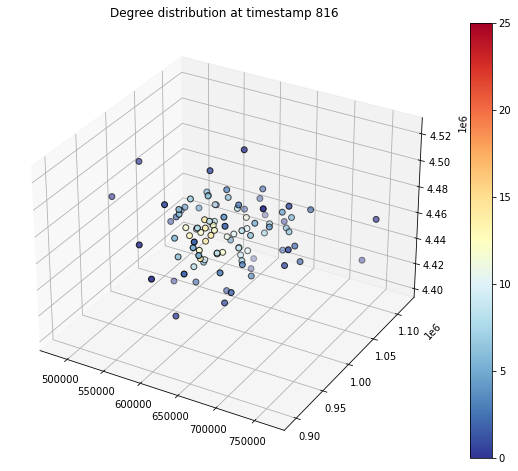

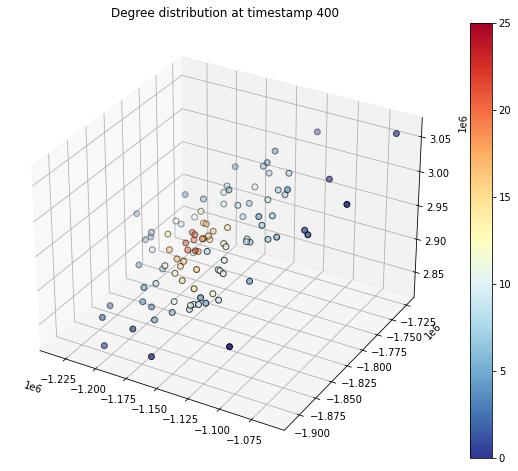

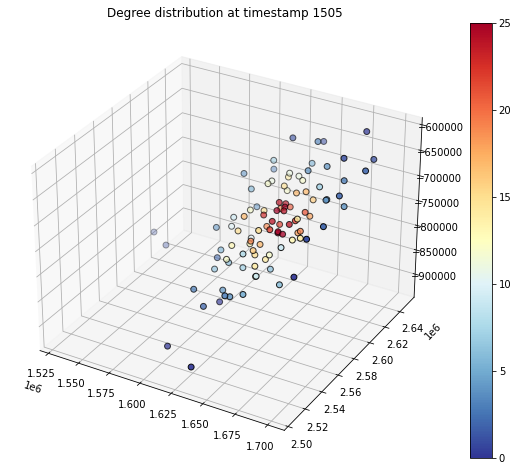

In [6]:
# Display the node degrees

def colormap(swarm, val, title=None, vmin=0, vmax=25):
    fig = plt.figure(figsize=(10,8))
    ax = plt.axes(projection='3d')
    x_data = [node.x for node in swarm.nodes]
    y_data = [node.y for node in swarm.nodes]
    z_data = [node.z for node in swarm.nodes]
    
    cm = plt.cm.get_cmap('RdYlBu_r')
    sc = ax.scatter(x_data, y_data, z_data, c=val, s=35, edgecolors='black', cmap=cm, vmin=vmin, vmax=vmax)
    plt.colorbar(sc)
    ax.set_title(title)
    
    
for tsp, swarm in swarm_topo.items():
    colormap(swarm, val=swarm.degree(), title='Degree distribution at timestamp '+str(tsp))

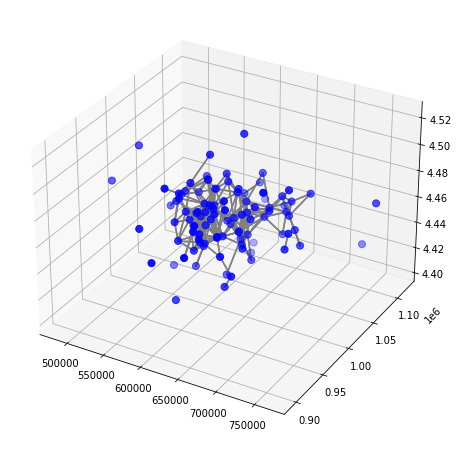

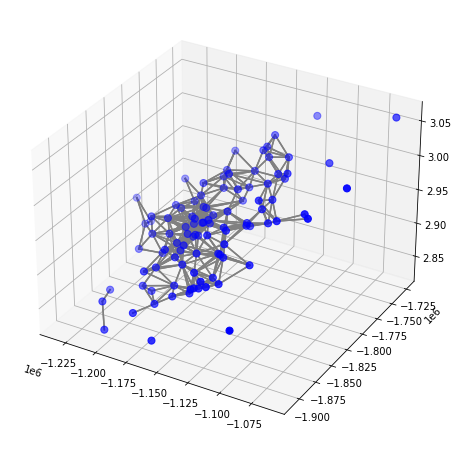

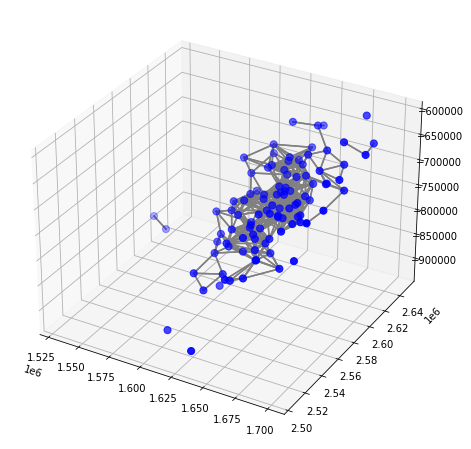

In [7]:
# Plot the network

for swarm in swarm_topo.values():
    swarm.plot_edges()

In [5]:
# Assign group to nodes (MDRW)

def MDRW(swarm, n=10, s=1):
    sources = sample(swarm.nodes, n) # Initial random sources
    
    groups = {} # Dict(group ID:list(nodes))
    for group_id, src in enumerate(sources): # Initialize swarms
        src.set_group(group_id)
        groups[group_id] = [src]
    free_nodes = [n for n in swarm.nodes if n.group==-1]
    while free_nodes: # Spread paths
        for group_id in groups.keys():
            n_i = groups[group_id][-1] # Current node
            free_neighbors = set(free_nodes).intersection(n_i.neighbors)
            if free_neighbors: # At least one unassigned neighbor
                n_j = n_i.random_walk(group_id) # Next node
            else:
                n_j = swarm.random_jump(s) # If no neighbor, perform random jump in the graph
            n_j.set_group(n_i.group)
            groups[group_id].append(n_j)
            free_nodes.remove(n_j)
    return groups

In [6]:
swarm_topo[T_LOW].reset_groups()
groups = MDRW(swarm_topo[T_LOW], n=10)

for id, group in groups.items():
    print('Group '+str(id)+':', [n.id for n in group])

Group 0: [72, 80, 57, 77, 81, 66, 97, 42, 47, 61]
Group 1: [89, 31, 91, 64, 82, 19, 51, 55, 67, 73]
Group 2: [2, 11, 17, 48, 59, 20, 28, 14, 49, 63]
Group 3: [44, 5, 52, 46, 8, 21, 32, 29, 10, 4]
Group 4: [13, 25, 24, 27, 16, 33, 6, 45, 93, 68]
Group 5: [0, 75, 70, 65, 12, 95, 79, 35, 36, 76]
Group 6: [99, 22, 90, 71, 23, 69, 87, 9, 53, 85]
Group 7: [58, 88, 98, 40, 18, 15, 74, 37, 54, 3]
Group 8: [83, 94, 7, 39, 62, 30, 34, 38, 56, 86]
Group 9: [41, 50, 78, 60, 84, 1, 26, 43, 96, 92]


In [22]:
#swarm_topo[T_LOW].reset_groups()
#swarm_topo[T_LOW].RNS(clist=range(10), s=1)
#swarm_topo[T_LOW].ForestFire()
modularity(swarm_topo[T_LOW], neighbor_matrix[T_LOW], edges)

0.14694197223211086

## 2. Find all paths using NetworkX

In [7]:
# Compute all paths between pairs of nodes

import networkx as nx

In [8]:
def diameter(swarm, group):
    G = swarm.swarm_to_nxgraph()
    node_ids = [n.id for n in group]
    max_length = (0,0,0) # Source, target, path_length
    for ni in node_ids:
        for nj in node_ids:
            if nx.has_path(G, ni, nj):
                sp = nx.shortest_path_length(G, ni, nj)
                if sp > max_length[2]:
                    max_length = (ni, nj, sp)
    return max_length


# Adding efficiency constraints
def rank_by_shortest_path(swarm):
    # Return a 2D matrix such that m[nid_1][nid_2] = rank of node 2 wrt node 1 (shortest path length)
    sp_matrix = {} # Dict(src_id:List(shortest_path_lengths))
    G = swarm.swarm_to_nxgraph()
    for ni in swarm.nodes:
        sp_matrix[ni.id] = []
        for nj in swarm.nodes:
            if nx.has_path(G, ni.id, nj.id):
                sp_matrix[ni.id].append(nx.shortest_path_length(G, ni.id, nj.id)) # If src=dest then 0
            else:
                sp_matrix[ni.id].append(-1)
    return sp_matrix

def is_efficient(ranks:dict, path:list, debug=False):
    # A path is efficient if the node ranks are constantly increasing
    src_id = path[0]
    prev_rank = 0
    for nid in path:
        node_rank = ranks[src_id][nid]
        if debug:
            print('Node ID:', nid, '\tRank:', node_rank)
        if node_rank < prev_rank:
            if debug:
                print('The rank is lower than the previous one: not efficient.')
            return False 
        else:
            prev_rank = node_rank
    if debug:
        print('The path is efficient.')
    return True

def get_TTL_by_dia(swarm, group=None, epsilon=2):
    dia = swarm.diameter(swarm)[2] # Only retrieve diameter
    if group:
        dia = diameter(swarm, group)[2]
    return dia + epsilon

def get_TTL_by_spl(graph, source, dest, epsilon=2):
    return nx.shortest_path_length(graph, source, dest)+epsilon

def link_likelihood(path:list, ref_path:list):
    # Returns the likelihood percentage
    src_id, dst_id = ref_path[0], ref_path[-1]
    spl = len(ref_path)-1
    common_nodes = set(ref_path).intersection(set(path))
    common_nodes.discard(src_id)
    common_nodes.discard(dst_id)
    return(round(len(common_nodes)/spl*100, 2))

def is_different(path:list, ref_path:list, threshold=67):
    likelihood = link_likelihood(path, ref_path)
    if likelihood <= threshold: # Path is less likely to ref than the threshold
        return True
    return False
    

In [9]:
swarm = swarm_topo[T_LOW]
ranks = rank_by_shortest_path(swarm)
graph = swarm.swarm_to_nxgraph()

print(graph)



# Dict to store data (convert later into pd.DataFrame)
data_dict = {
    'Source':[],
    'Dest':[],
    'Shortest path length':[],
    'Cutoff length':[],
    'Not-too-long paths':[],
    'Efficient paths':[],
    'Likelihood < 50':[],
    'Likelihood < 34':[],
    'Likelihood < 25':[]
}

def add_data_row(data_dict,src,dst,spl,cut,ntl,eff,diff_50,diff_34,diff_25):
        data_dict['Source'].append(src)
        data_dict['Dest'].append(dst)
        data_dict['Shortest path length'].append(spl)
        data_dict['Cutoff length'].append(cut)
        data_dict['Not-too-long paths'].append(ntl)
        data_dict['Efficient paths'].append(eff)
        data_dict['Likelihood < 50'].append(diff_50)
        data_dict['Likelihood < 34'].append(diff_34)
        data_dict['Likelihood < 25'].append(diff_25)

Graph with 100 nodes and 265 edges


### 2.1  Compute all paths on undivided graph

In [10]:
visited_pairs = []

for ni in swarm.nodes:
    src_id = ni.id
    for nj in swarm.nodes:
        dst_id = nj.id
        if set((src_id,dst_id)) not in visited_pairs:
            visited_pairs.append(set((src_id,dst_id)))
            if dst_id != src_id and nx.has_path(graph, src_id, dst_id):
                # Compute shortest path
                shortest_path = nx.shortest_path(graph, source=src_id, target=dst_id)
                spl = nx.shortest_path_length(graph, source=src_id, target=dst_id)
                print('Source:', src_id, '\tDestination:', dst_id, '\tSPL:', spl)
                
                # Compute not-too-long paths
                cutoff = min(get_TTL_by_dia(swarm, epsilon=0), get_TTL_by_spl(graph, src_id, dst_id, epsilon=0))
                #print('Cutoff length:', cutoff)
                simple_paths = nx.all_simple_paths(graph, source=src_id, target=dst_id, cutoff=cutoff)
                list_paths = list(simple_paths)
                #print('Number of not-too-long paths:', len(list_paths))
                
                # Reduce to efficient paths
                efficient_paths = []
                for path in list_paths:
                    if is_efficient(ranks, path):
                        efficient_paths.append(path)
                #print('Number of efficient paths:', len(efficient_paths))
                
                # Re-reduce to different paths
                diff_50, diff_34, diff_25 = [], [], []
                for path in efficient_paths:
                    if is_different(path, shortest_path, threshold=50):
                        diff_50.append(path)
                        if is_different(path, shortest_path, threshold=34):
                            diff_34.append(path)
                            if is_different(path, shortest_path, threshold=25):
                                diff_25.append(path)
                #print('Likelihood <50:', len(diff_50), '\tLikelihood <34:', len(diff_34), '\tLikelihood <25:', len(diff_25), '\n')
        
                add_data_row(data_dict, 
                            src=src_id, 
                            dst=dst_id, 
                            spl=spl, 
                            cut=cutoff, 
                            ntl=len(list_paths), 
                            eff=len(efficient_paths),
                            diff_50=len(diff_50),
                            diff_34=len(diff_34),
                            diff_25=len(diff_25))

Source: 0 	Destination: 1 	SPL: 6
Source: 0 	Destination: 2 	SPL: 6
Source: 0 	Destination: 5 	SPL: 6
Source: 0 	Destination: 6 	SPL: 4
Source: 0 	Destination: 7 	SPL: 4
Source: 0 	Destination: 8 	SPL: 6
Source: 0 	Destination: 9 	SPL: 3
Source: 0 	Destination: 11 	SPL: 6
Source: 0 	Destination: 12 	SPL: 3
Source: 0 	Destination: 14 	SPL: 5
Source: 0 	Destination: 15 	SPL: 7
Source: 0 	Destination: 16 	SPL: 5
Source: 0 	Destination: 17 	SPL: 6
Source: 0 	Destination: 18 	SPL: 6
Source: 0 	Destination: 19 	SPL: 5
Source: 0 	Destination: 20 	SPL: 7
Source: 0 	Destination: 22 	SPL: 4
Source: 0 	Destination: 23 	SPL: 4
Source: 0 	Destination: 24 	SPL: 7
Source: 0 	Destination: 26 	SPL: 7
Source: 0 	Destination: 27 	SPL: 5
Source: 0 	Destination: 28 	SPL: 8
Source: 0 	Destination: 30 	SPL: 4
Source: 0 	Destination: 31 	SPL: 8
Source: 0 	Destination: 32 	SPL: 1
Source: 0 	Destination: 33 	SPL: 4
Source: 0 	Destination: 34 	SPL: 5
Source: 0 	Destination: 35 	SPL: 6
Source: 0 	Destination: 36 

In [11]:
df = pd.DataFrame(data_dict)
df

,Source,Dest,Shortest path length,Cutoff length,Not-too-long paths,Efficient paths,Likelihood < 50,Likelihood < 34,Likelihood < 25
0,0,1,6,6,4,4,1,0,0
1,0,2,6,6,8,8,5,1,0
2,0,5,6,6,22,22,19,16,5
3,0,6,4,4,4,4,3,2,2
4,0,7,4,4,2,2,1,0,0
...,...,...,...,...,...,...,...,...,...
3318,95,97,4,4,2,2,1,0,0
3319,95,98,6,6,1,1,0,0,0
3320,96,97,5,5,1,1,0,0,0
3321,96,98,6,6,17,17,12,7,3


In [12]:
df.to_csv('../output/data/path_redundancy_undivided_low_cutoff0.csv', sep=',')

### 2.2  Compute all paths on divided graph (intra-group only)

In [39]:
# Dict to store data (convert later into pd.DataFrame)
data_dict = {
    'Group':[],
    'Source':[],
    'Dest':[],
    'Shortest path length':[]
}

def add_data_row(data_dict,group,src,dst,spl):
    data_dict['Group'].append(group)
    data_dict['Source'].append(src)
    data_dict['Dest'].append(dst)
    data_dict['Shortest path length'].append(spl)
    
def nework_efficiency(df, groups):
    efficiencies = []
    for group_id in groups.keys():
        df_group = df[df['Group']==group_id]
        efficiencies.append((1/df_group['Shortest path length']).sum() * (2/90))
    return np.mean(efficiencies)

In [28]:
visited_pairs = []

for group_id, group_nodes in groups.items():
    for ni in group_nodes:
        src_id = ni.id
        for nj in group_nodes:
            dst_id = nj.id
            if set((src_id,dst_id)) not in visited_pairs:
                visited_pairs.append(set((src_id,dst_id)))
                if dst_id != src_id and nx.has_path(graph, src_id, dst_id):
                    # Compute shortest path
                    #shortest_path = nx.shortest_path(graph, source=src_id, target=dst_id)
                    spl = nx.shortest_path_length(graph, source=src_id, target=dst_id)
                    print('Group:', group_id, '\tSource:', src_id, '\tDestination:', dst_id, '\tSPL:', spl)
                    
                    add_data_row(data_dict, 
                                    group=group_id,
                                    src=src_id, 
                                    dst=dst_id, 
                                    spl=spl)

Group: 0 	Source: 72 	Destination: 80 	SPL: 1
Group: 0 	Source: 72 	Destination: 66 	SPL: 2
Group: 0 	Source: 72 	Destination: 42 	SPL: 2
Group: 0 	Source: 72 	Destination: 90 	SPL: 2
Group: 0 	Source: 72 	Destination: 69 	SPL: 3
Group: 0 	Source: 72 	Destination: 24 	SPL: 6
Group: 0 	Source: 72 	Destination: 64 	SPL: 8
Group: 0 	Source: 80 	Destination: 66 	SPL: 1
Group: 0 	Source: 80 	Destination: 42 	SPL: 1
Group: 0 	Source: 80 	Destination: 90 	SPL: 2
Group: 0 	Source: 80 	Destination: 69 	SPL: 2
Group: 0 	Source: 80 	Destination: 24 	SPL: 5
Group: 0 	Source: 80 	Destination: 64 	SPL: 7
Group: 0 	Source: 66 	Destination: 42 	SPL: 1
Group: 0 	Source: 66 	Destination: 90 	SPL: 2
Group: 0 	Source: 66 	Destination: 69 	SPL: 2
Group: 0 	Source: 66 	Destination: 24 	SPL: 5
Group: 0 	Source: 66 	Destination: 64 	SPL: 7
Group: 0 	Source: 42 	Destination: 90 	SPL: 1
Group: 0 	Source: 42 	Destination: 69 	SPL: 1
Group: 0 	Source: 42 	Destination: 24 	SPL: 5
Group: 0 	Source: 42 	Destination:

In [29]:
df = pd.DataFrame(data_dict)
df

,Group,Source,Dest,Shortest path length
0,0,72,80,1
1,0,72,66,2
2,0,72,42,2
3,0,72,90,2
4,0,72,69,3
...,...,...,...,...
296,9,88,58,1
297,9,88,91,1
298,9,89,58,1
299,9,89,91,1


In [40]:
nework_efficiency(df, groups)

0.36017732884399545

In [13]:
# Dict to store data (convert later into pd.DataFrame)
data_dict = {
    'Source':[],
    'Dest':[],
    'Shortest path length':[],
    'Cutoff length':[],
    'Not-too-long paths':[],
    'Efficient paths':[],
    'Likelihood < 50':[],
    'Likelihood < 34':[],
    'Likelihood < 25':[]
}

visited_pairs = []

for group_id, group_nodes in groups.items():
    for ni in group_nodes:
        src_id = ni.id
        for nj in group_nodes:
            dst_id = nj.id
            if set((src_id,dst_id)) not in visited_pairs:
                visited_pairs.append(set((src_id,dst_id)))
                if dst_id != src_id and nx.has_path(graph, src_id, dst_id):
                    # Compute shortest path
                    shortest_path = nx.shortest_path(graph, source=src_id, target=dst_id)
                    spl = nx.shortest_path_length(graph, source=src_id, target=dst_id)
                    print('Group:', group_id, '\tSource:', src_id, '\tDestination:', dst_id, '\tSPL:', spl)
                    
                    # Compute not-too-long paths
                    cutoff = min(get_TTL_by_dia(swarm, epsilon=0), get_TTL_by_spl(graph, src_id, dst_id, epsilon=0))
                    #print('Cutoff length:', cutoff)
                    simple_paths = nx.all_simple_paths(graph, source=src_id, target=dst_id, cutoff=cutoff)
                    list_paths = list(simple_paths)
                    #print('Number of not-too-long paths:', len(list_paths))
                    
                    # Reduce to efficient paths
                    efficient_paths = []
                    for path in list_paths:
                        if is_efficient(ranks, path):
                            efficient_paths.append(path)
                    #print('Number of efficient paths:', len(efficient_paths))
                    
                    # Re-reduce to different paths
                    diff_50, diff_34, diff_25 = [], [], []
                    for path in efficient_paths:
                        if is_different(path, shortest_path, threshold=50):
                            diff_50.append(path)
                            if is_different(path, shortest_path, threshold=34):
                                diff_34.append(path)
                                if is_different(path, shortest_path, threshold=25):
                                    diff_25.append(path)
                    #print('Likelihood <50:', len(diff_50), '\tLikelihood <34:', len(diff_34), '\tLikelihood <25:', len(diff_25), '\n')
            
                    add_data_row(data_dict, 
                                src=src_id, 
                                dst=dst_id, 
                                spl=spl, 
                                cut=cutoff, 
                                ntl=len(list_paths), 
                                eff=len(efficient_paths),
                                diff_50=len(diff_50),
                                diff_34=len(diff_34),
                                diff_25=len(diff_25))

Group: 0 	Source: 72 	Destination: 80 	SPL: 1
Group: 0 	Source: 72 	Destination: 57 	SPL: 2
Group: 0 	Source: 72 	Destination: 77 	SPL: 3
Group: 0 	Source: 72 	Destination: 81 	SPL: 3
Group: 0 	Source: 72 	Destination: 66 	SPL: 2
Group: 0 	Source: 72 	Destination: 97 	SPL: 2
Group: 0 	Source: 72 	Destination: 42 	SPL: 2
Group: 0 	Source: 80 	Destination: 57 	SPL: 1
Group: 0 	Source: 80 	Destination: 77 	SPL: 2
Group: 0 	Source: 80 	Destination: 81 	SPL: 2
Group: 0 	Source: 80 	Destination: 66 	SPL: 1
Group: 0 	Source: 80 	Destination: 97 	SPL: 1
Group: 0 	Source: 80 	Destination: 42 	SPL: 1
Group: 0 	Source: 57 	Destination: 77 	SPL: 1
Group: 0 	Source: 57 	Destination: 81 	SPL: 1
Group: 0 	Source: 57 	Destination: 66 	SPL: 1
Group: 0 	Source: 57 	Destination: 97 	SPL: 2
Group: 0 	Source: 57 	Destination: 42 	SPL: 2
Group: 0 	Source: 77 	Destination: 81 	SPL: 1
Group: 0 	Source: 77 	Destination: 66 	SPL: 1
Group: 0 	Source: 77 	Destination: 97 	SPL: 2
Group: 0 	Source: 77 	Destination:

In [14]:
df = pd.DataFrame(data_dict)
df

,Source,Dest,Shortest path length,Cutoff length,Not-too-long paths,Efficient paths,Likelihood < 50,Likelihood < 34,Likelihood < 25
0,72,80,1,1,1,1,1,1,1
1,72,57,2,2,2,2,2,1,1
2,72,77,3,3,10,10,9,9,5
3,72,81,3,3,5,5,4,4,2
4,72,66,2,2,3,3,3,2,2
...,...,...,...,...,...,...,...,...,...
299,1,43,4,4,2,2,1,0,0
300,1,96,3,3,2,2,1,1,0
301,26,43,4,4,2,2,1,0,0
302,26,96,3,3,2,2,1,1,0


In [15]:
df.to_csv('../output/data/path_redundancy_divided_low_cutoff0.csv', sep=',')

## 3. Analyze path lengths

In [ ]:
group_id = 0
print('Group '+str(group_id)+':')
print([n.id for n in groups[group_id]])
[src_id, dst_id, length] = diameter(swarm_topo[T_LOW], groups[0])
print('Diameter:', [src_id, dst_id, length])

In [47]:
shortest_to_simple_1 = {} # Dict to store results: number of paths wrt shortest path length, cutoff +1
shortest_to_simple_2 = {} # Dict to store results: number of paths wrt shortest path length, cutoff +1

In [48]:
for group_id, group in groups.items():
    print('Analysing group', group_id)
    nodes = [n.id for n in group]
    print(nodes)

    for src_id in nodes:
        for dst_id in nodes:
            if nx.has_path(graph_low, src_id, dst_id) and dst_id != src_id:
                spl = nx.shortest_path_length(graph_low, source=src_id, target=dst_id)
                if spl not in shortest_to_simple_2.keys():
                    shortest_to_simple_2[spl] = []
                    
                cutoff_length = spl + 2 # Arbitrary choice
                simple_paths = nx.all_simple_paths(graph_low, source=src_id, target=dst_id, cutoff=cutoff_length)
                list_paths = list(simple_paths)
                shortest_to_simple_2[spl].append(len(list_paths))
                #print('Number of paths from '+str(src_id)+' to '+str(dst_id)+' (cutoff: '+str(cutoff_length)+'):', len(list_paths))
            elif not nx.has_path(graph_low, src_id, dst_id):
                print('No path from '+str(src_id)+' to '+str(dst_id)+'.')
        #print('\n')

Analysing group 0
[14, 72, 45, 34, 22, 56, 6, 12, 77, 79]
Analysing group 1
[8, 46, 52, 5, 60, 68, 29, 10, 54, 84]
No path from 8 to 29.
No path from 8 to 10.
No path from 8 to 54.
No path from 46 to 29.
No path from 46 to 10.
No path from 46 to 54.
No path from 52 to 29.
No path from 52 to 10.
No path from 52 to 54.
No path from 5 to 29.
No path from 5 to 10.
No path from 5 to 54.
No path from 60 to 29.
No path from 60 to 10.
No path from 60 to 54.
No path from 68 to 29.
No path from 68 to 10.
No path from 68 to 54.
No path from 29 to 8.
No path from 29 to 46.
No path from 29 to 52.
No path from 29 to 5.
No path from 29 to 60.
No path from 29 to 68.
No path from 29 to 54.
No path from 29 to 84.
No path from 10 to 8.
No path from 10 to 46.
No path from 10 to 52.
No path from 10 to 5.
No path from 10 to 60.
No path from 10 to 68.
No path from 10 to 54.
No path from 10 to 84.
No path from 54 to 8.
No path from 54 to 46.
No path from 54 to 52.
No path from 54 to 5.
No path from 54 to 60.


In [49]:
for spl, nb_path in shortest_to_simple_1.items():
    print('SPL =', spl, '\tNumber of simple path elements (cutoff +1):', len(nb_path))
    
for spl, nb_path in shortest_to_simple_2.items():
    print('SPL =', spl, '\tNumber of simple path elements (cutoff +2):', len(nb_path))

SPL = 1 	Number of simple path elements (cutoff +1): 246
SPL = 2 	Number of simple path elements (cutoff +1): 127
SPL = 3 	Number of simple path elements (cutoff +1): 70
SPL = 5 	Number of simple path elements (cutoff +1): 68
SPL = 4 	Number of simple path elements (cutoff +1): 52
SPL = 7 	Number of simple path elements (cutoff +1): 35
SPL = 6 	Number of simple path elements (cutoff +1): 62
SPL = 8 	Number of simple path elements (cutoff +1): 12
SPL = 9 	Number of simple path elements (cutoff +1): 4
SPL = 1 	Number of simple path elements (cutoff +2): 222
SPL = 2 	Number of simple path elements (cutoff +2): 112
SPL = 3 	Number of simple path elements (cutoff +2): 60
SPL = 5 	Number of simple path elements (cutoff +2): 66
SPL = 4 	Number of simple path elements (cutoff +2): 46
SPL = 7 	Number of simple path elements (cutoff +2): 34
SPL = 6 	Number of simple path elements (cutoff +2): 58
SPL = 8 	Number of simple path elements (cutoff +2): 12
SPL = 9 	Number of simple path elements (cuto

Text(0.5, 1.0, 'Path redundancy analysis in a weakly-connected graph')

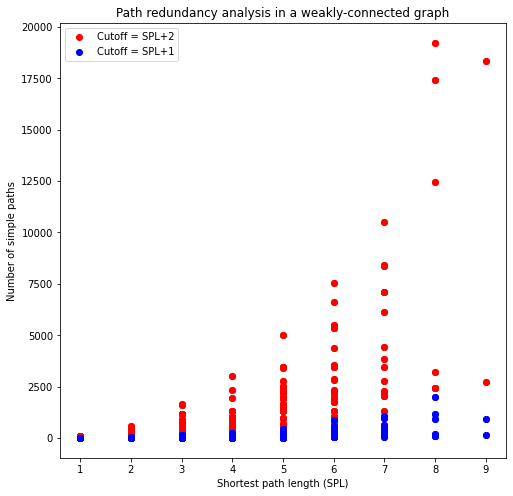

In [51]:
data_1 = []
for spl, nb_path in shortest_to_simple_1.items():
    for nbp in nb_path:
        data_1.append((spl, nbp))
        
idx_1 = [e[0] for e in data_1] # Shortest path lengths
nb_paths_1 = [e[1] for e in data_1]

data_2 = []
for spl, nb_path in shortest_to_simple_2.items():
    for nbp in nb_path:
        data_2.append((spl, nbp))
        
idx_2 = [e[0] for e in data_2] # Shortest path lengths
nb_paths_2 = [e[1] for e in data_2]

plt.figure(figsize=(8,8))
plt.scatter(idx_2, nb_paths_2, c='red', lw=1, label='Cutoff = SPL+2')
plt.scatter(idx_1, nb_paths_1, c='blue', lw=1, label='Cutoff = SPL+1')
plt.legend(loc='upper left')
plt.xlabel('Shortest path length (SPL)')
plt.ylabel('Number of simple paths')
plt.title('Path redundancy analysis in a weakly-connected graph')